In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.cluster import DBSCAN
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable
import warnings

In [3]:
RED = "\033[91m"
GREEN = "\033[92m"
BLUE = "\033[94m"
RESET = "\033[0m"

warnings.filterwarnings('ignore')

pd.set_option('display.precision', 3)

print(GREEN + "\n ----------------------- Phase I: Feature Engineering & EDA : -----------------------\n" + GREEN)

car_prices_df = pd.read_csv("car_prices.csv")
print("info: \n", car_prices_df.info())
print("Describe: \n", car_prices_df.describe())
print("shape of the database ", car_prices_df.shape)
print("columns : ", car_prices_df.columns)

missing_values = car_prices_df.isna().sum()
print("missing values in each column:\n", missing_values.sort_values(ascending=False))
print("total number of missing values in the dataset:", car_prices_df.isna().sum().sum())

missing_values_per_column = car_prices_df.isna().sum()
print("percentage of missing values per column:\n", (missing_values_per_column / car_prices_df.shape[0]) * 100)
car_prices_df = car_prices_df.dropna(subset=['sellingprice'])

print("missing values:", car_prices_df.isna().sum())
for column in car_prices_df.select_dtypes(include=['number']).columns:
    car_prices_df[column].fillna(car_prices_df[column].mean(), inplace=True)

for column in car_prices_df.select_dtypes(exclude=['number']).columns:
    print("mode of the column", car_prices_df[column].mode()[0])
    car_prices_df[column].fillna(car_prices_df[column].mode()[0], inplace=True)

car_prices_df['saledate'] = pd.to_datetime(car_prices_df['saledate'], errors='coerce', utc=True)
car_prices_df['saleyear'] = car_prices_df['saledate'].dt.year
car_prices_df['saleyear'] = car_prices_df['saleyear'].fillna(-1).astype(int)

print(car_prices_df['saleyear'].head())

car_prices_df = car_prices_df.drop('saledate', axis=1)
print("total number of missing values after filling: ", car_prices_df.isna().sum())

duplicate_rows = car_prices_df[car_prices_df.duplicated()]
print(duplicate_rows.shape)
print("there is no duplicate data in the given dataset")


 ----------------------- Phase I: Feature Engineering & EDA : -----------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: f


------------START OF FEATURE SELECTION & DIMENSIONALITY REDUCTION--------------
   year  make  model  trim  body  transmission     vin  state  condition  \
0  2015    24    658   998    36             1  403792     29        5.0   
1  2015    24    658   998    36             1  403784     29        5.0   
2  2014     3      9   283    37             1  506996     29       45.0   
3  2015    51    596  1399    37             1  546639     29       41.0   
4  2014     3     42   498    37             1  508029     29       43.0   

   odometer  color  interior  seller      mmr  sellingprice  saleyear  
0   16639.0     43         1    7201  20500.0       21500.0      2014  
1    9393.0     43         0    7201  20800.0       21500.0      2014  
2    1331.0     33         1    4978  31900.0       30000.0      2015  
3   14282.0     43         1   13794  27500.0       27750.0      2015  
4    2641.0     33         1    4978  66000.0       67000.0      2014  

------------------------STAND

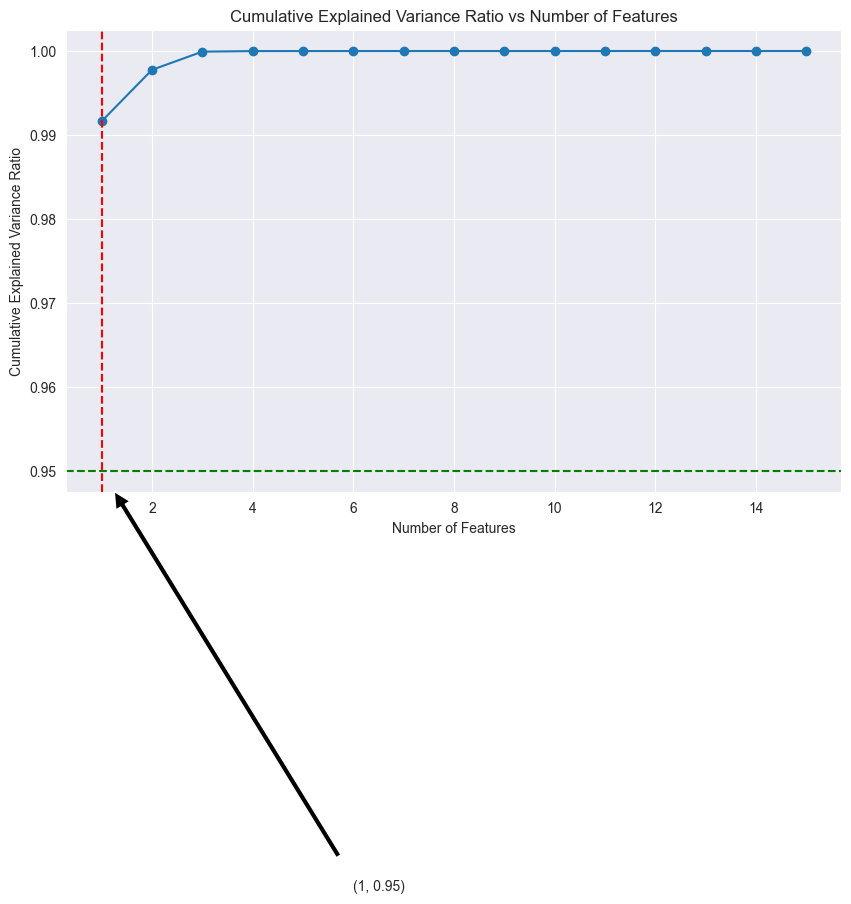

Number of features needed for explaining more than 95% of the dependent variance: 1
feature_importance_dict:  [['mmr', 0.6662276836971582], ['year', 0.11756668260225317], ['state', 0.10171255194675374], ['make', 0.024051202545343625], ['odometer', 0.022676590054722327], ['vin', 0.017888846256898915], ['condition', 0.01773446969099341], ['trim', 0.016098060340282317], ['saleyear', 0.008961581721284181], ['color', 0.005239840151837281], ['seller', 0.00137765705951194], ['body', 0.00033483593545208744], ['interior', 0.00012999431663796333], ['model', 3.4961046588177348e-09], ['transmission', 1.8476626884975865e-10]]


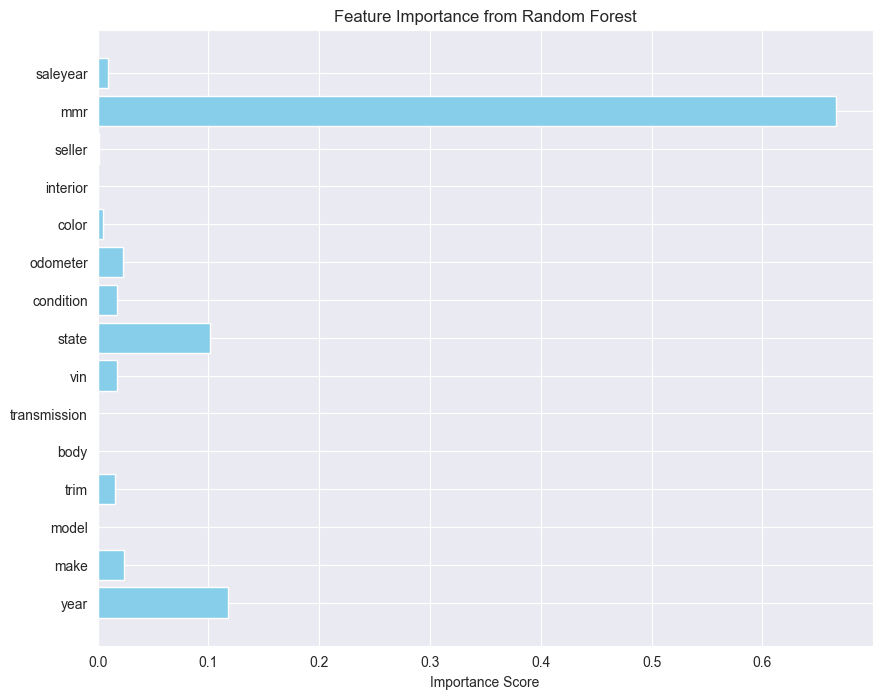


----------------- START OF SINGLE VALUE DECOMPOSITION -------------------
[1.13429410e+06 8.91372428e+04 5.29995997e+04 9.51280282e+03
 1.90130776e+03 1.42460134e+03 8.99394118e+02 8.56783826e+02
 7.70505241e+02 7.59132175e+02 7.50248791e+02 7.48140814e+02
 7.15813121e+02 6.97626370e+02 6.44905276e+02] (558825, 15) (15, 15)

----------------- END OF SINGLE VALUE DECOMPOSITION -------------------


----------------- START OF VIF -------------------
        Variable     VIF
0           year  55.969
14      saleyear  53.234
13           mmr  20.700
9       odometer   9.980
12        seller   9.811
3           trim   8.681
6            vin   6.074
2          model   2.443
8      condition   1.100
4           body   1.049
7          state   1.039
10         color   1.036
11      interior   1.032
1           make   1.028
5   transmission   1.009
15         const   1.000


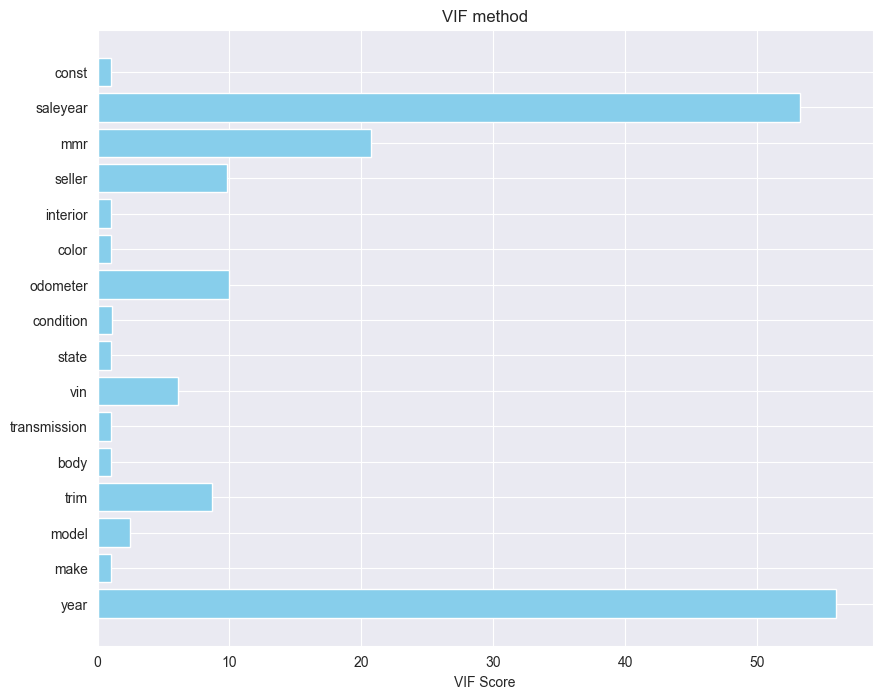


----------------- END OF VIF -------------------


----------------- START OF ANOMALY REMOVAL/OUTLIER DETECTION (Z-SCORE) -------------------

df shapes after anomaly deletion:  (558825, 8) (558813, 8)


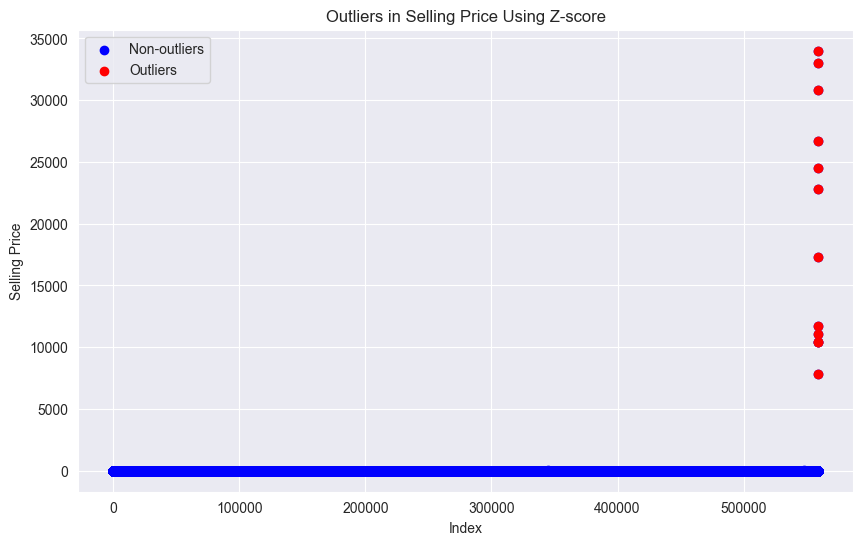


----------------- END OF ANOMALY REMOVAL/OUTLIER DETECTION (Z-SCORE)-------------------


----------------- START OF COVARIANCE MATRIX -------------------


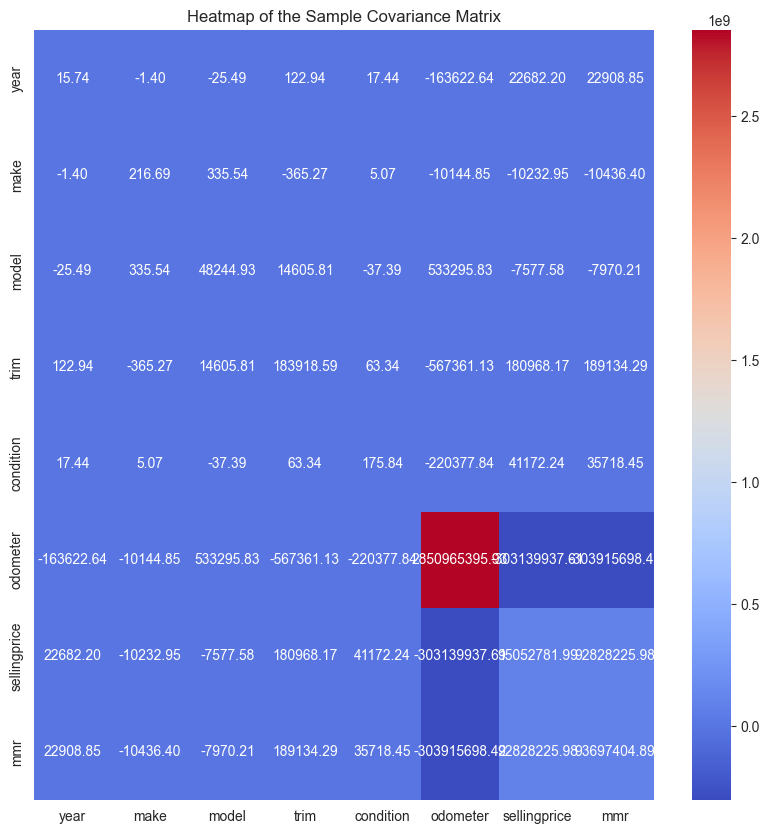


----------------- END OF COVARIANCE MATRIX -------------------


----------------- START OF CORRELATION MATRIX -------------------


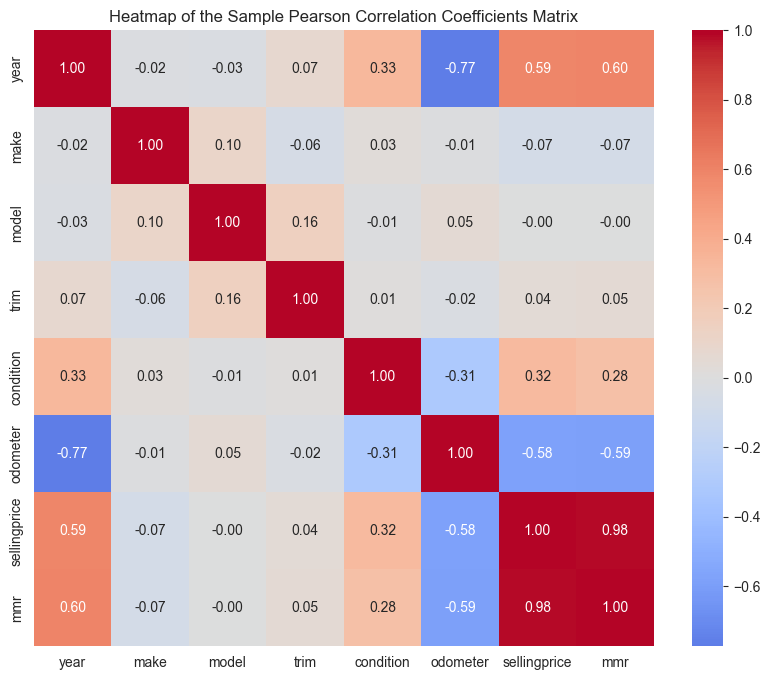


----------------- END OF CORRELATION MATRIX -------------------


In [4]:
print("\n------------START OF FEATURE SELECTION & DIMENSIONALITY REDUCTION--------------\n")
label_encoders = {}
data = car_prices_df.copy()
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

encoded_data = data.copy()

print(data.head())

print("\n------------------------STANDARDIZE THE DATA---------------------\n")

scalar = StandardScaler()
data_scaled = scalar.fit_transform(data)
data_scaled_df = pd.DataFrame(data=data_scaled, columns=data.columns)
data.update(data_scaled_df)
print(data.head())

print("\n-----------Dimensionality reduction/feature selection---------\n")
X = data.drop(['sellingprice'], axis=1)
y = data['sellingprice']

pca = PCA()
X_pca = pca.fit_transform(X)

print(X.columns)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_features_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Features')
plt.grid(True)
plt.axvline(x=n_features_95, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')

plt.annotate(f'({n_features_95}, 0.95)', xy=(n_features_95, 0.95), xytext=(n_features_95 + 5, 0.90),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

print("Number of features needed for explaining more than 95% of the dependent variance:", n_features_95)

rf = RandomForestRegressor(n_estimators=8, max_depth=10, random_state=5805)

rf.fit(X, y)
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted([[key, feature_importance_dict[key]] for key in feature_importance_dict],
                                   key=lambda x: x[1], reverse=True)
print("feature_importance_dict: ", sorted_feature_importance)

features = list(feature_importance_dict.keys())
importances = list(feature_importance_dict.values())

plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.show()

print("\n----------------- START OF SINGLE VALUE DECOMPOSITION -------------------\n")

numerical_cols = X.select_dtypes(include=[np.number])

U, s, Vt = svd(numerical_cols, full_matrices=False)

print(s, U.shape, Vt.shape)

print("\n----------------- END OF SINGLE VALUE DECOMPOSITION -------------------\n")

print("\n----------------- START OF VIF -------------------\n")

X_vif = X.select_dtypes(include='number').assign(const=1)

vif_data = pd.DataFrame({
    'Variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

vif_sorted = vif_data.sort_values(by='VIF', ascending=False)
print(vif_sorted)
plt.figure(figsize=(10, 8))

plt.barh(vif_data['Variable'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF Score')
plt.title('VIF method')
plt.show()
print("\n----------------- END OF VIF -------------------\n")

final_selected_features = ['year', 'make', 'model', 'trim', 'condition', 'odometer', 'sellingprice', 'mmr']

print("\n----------------- START OF ANOMALY REMOVAL/OUTLIER DETECTION (Z-SCORE) -------------------\n")

cleaned_carprices_df = data[final_selected_features]
z_scores = np.abs(
    (cleaned_carprices_df['sellingprice'] - cleaned_carprices_df['sellingprice'].mean()) / cleaned_carprices_df[
        'sellingprice'].std())
data_cleaned_z = cleaned_carprices_df[z_scores < 3]
print("df shapes after anomaly deletion: ", cleaned_carprices_df.shape, data_cleaned_z.shape)
z_scores = np.abs((cleaned_carprices_df['sellingprice'] - cleaned_carprices_df['sellingprice'].mean()) / cleaned_carprices_df['sellingprice'].std())

outliers = z_scores >= 3

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_carprices_df.index, cleaned_carprices_df['sellingprice'], c='blue', label='Non-outliers')
plt.scatter(cleaned_carprices_df[outliers].index, cleaned_carprices_df[outliers]['sellingprice'], c='red', label='Outliers')
plt.title('Outliers in Selling Price Using Z-score')
plt.xlabel('Index')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

print("\n----------------- END OF ANOMALY REMOVAL/OUTLIER DETECTION (Z-SCORE)-------------------\n")

print("\n----------------- START OF COVARIANCE MATRIX -------------------\n")

covariance_matrix = encoded_data[final_selected_features].cov()
plt.figure(figsize=(10, 10))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of the Sample Covariance Matrix')
plt.show()
print("\n----------------- END OF COVARIANCE MATRIX -------------------\n")

print("\n----------------- START OF CORRELATION MATRIX -------------------\n")
correlation_matrix = data_cleaned_z.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap of the Sample Pearson Correlation Coefficients Matrix')
plt.show()

print("\n----------------- END OF CORRELATION MATRIX -------------------\n")

Phase II: Regression Analysis

----------------- START OF MULTIPLE LINEAR REGRESSION -------------------
                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 2.041e+06
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        02:12:18   Log-Likelihood:             1.4720e+05
No. Observations:              447050   AIC:                        -2.944e+05
Df Residuals:                  447042   BIC:                        -2.943e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

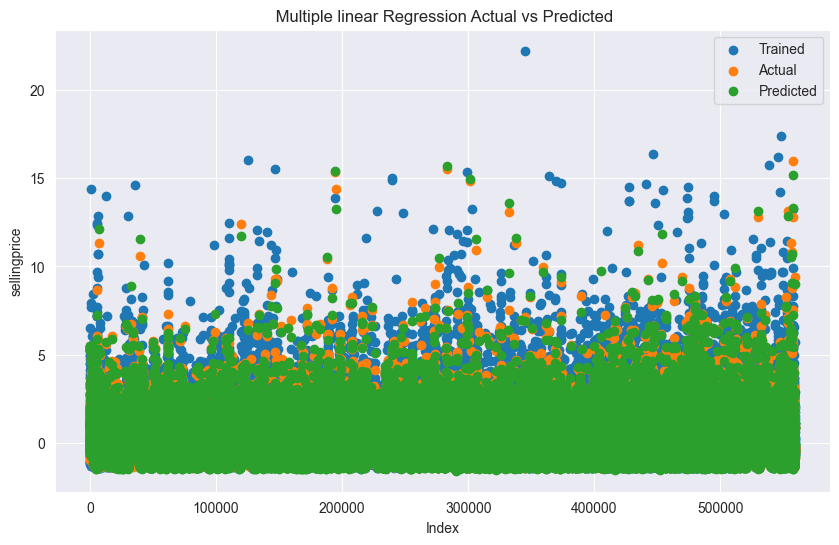


----------------- END OF MULTIPLE LINEAR REGRESSION -------------------


In [5]:
print(BLUE + "Phase II: Regression Analysis" + BLUE)
print("\n----------------- START OF MULTIPLE LINEAR REGRESSION -------------------\n")

X = data_cleaned_z.drop('sellingprice', axis=1)
y = data_cleaned_z['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5805)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()

model_summary = model.summary()
print(model_summary)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"MSE: {mse}")

predicted_values = model.predict(X_test)
intercept = model.params[0]
coefficients = model.params[1:]

# Printing the regression equation
print("Regression Equation:")
print(f"y = {intercept:.4f}", end="")
for i, coef in enumerate(coefficients, 1):
    print(f" + {coef:.4f}*X{i}", end="")
plt.figure(figsize=(10, 6))
plt.scatter(y_train.index, y_train, label='Trained')
plt.scatter(y_test.index, y_test, label='Actual')
plt.scatter(y_test.index, predicted_values, label='Predicted')
plt.title(' Multiple linear Regression Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('sellingprice')
plt.legend()
plt.show()


print("\n----------------- END OF MULTIPLE LINEAR REGRESSION -------------------\n")




Model summary at iteration 1 
                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 2.041e+06
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        02:17:10   Log-Likelihood:             1.4720e+05
No. Observations:              447050   AIC:                        -2.944e+05
Df Residuals:                  447042   BIC:                        -2.943e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.049e-05 

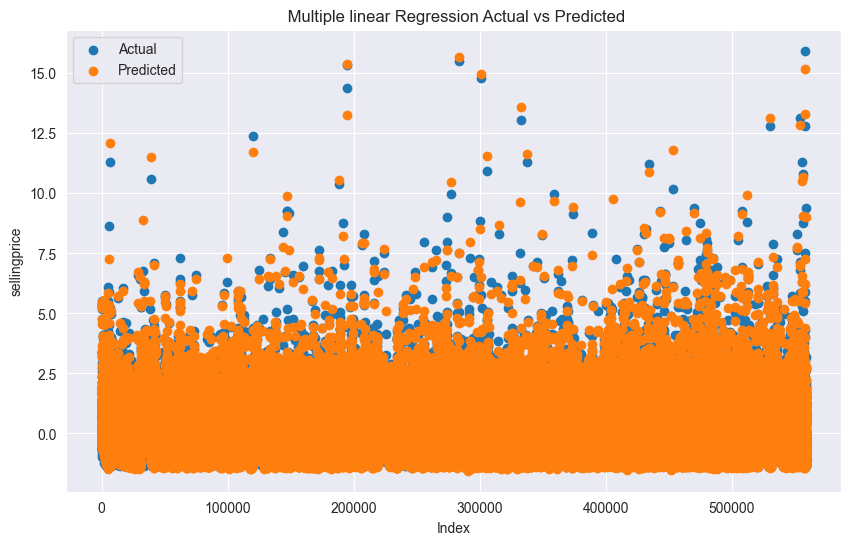

Mean Squared Error (MSE) BACKWARD STEPWISE REGRESSION : 0.029581721325528904

----------------- END OF MULTIPLE LINEAR REGRESSION (BACKWARD STEPWISE REGRESSION) -------------------


In [6]:
def backward_stepwise_regression(X_train, X_test, y_train, y_test, threshold=0.00001):
    selected_features = list(X_train.columns)
    all_results = []

    iteration = 1

    while len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_train_selected = sm.add_constant(X_train_selected)
        X_test_selected = X_test[selected_features]
        X_test_selected = sm.add_constant(X_test_selected)

        model = sm.OLS(y_train, X_train_selected).fit()
        p_values = model.pvalues[1:]

        eliminated_feature = None
        aic = model.aic
        bic = model.bic
        adj_r2 = model.rsquared_adj
        p_value = None

        if p_values.max() > threshold:
            eliminated_feature = p_values.idxmax()
            selected_features.remove(eliminated_feature)
            p_value = p_values.max()
        else:
            break

        results = {'Eliminated Feature': eliminated_feature,
                   'AIC': aic, 'BIC': bic, 'Adjusted R-squared': adj_r2,
                   'P-value': p_value,
                   'Selected Features': selected_features.copy()}
        all_results.append(results)

        print("Model summary at iteration {} ".format(iteration))
        print(model.summary())
        iteration += 1

    final_selected_features = selected_features
    return all_results, final_selected_features


all_results, final_selected_features = backward_stepwise_regression(X_train, X_test, y_train, y_test)

results_dfs = []
for i, results in enumerate(all_results):
    results_df = pd.DataFrame([results])
    results_df['Iteration'] = i + 1
    results_dfs.append(results_df)

results_df = pd.concat(results_dfs, ignore_index=True)

print("Process and Justification for Backward Stepwise Regression:")
print(results_df)
print("\nFinal Selected Features:", final_selected_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5805)

final_model = sm.OLS(y_train, X_train).fit()
predicted_values = final_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Actual')
plt.scatter(y_test.index, predicted_values, label='Predicted')
plt.title(' Multiple linear Regression Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('sellingprice')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, predicted_values)

print("Mean Squared Error (MSE) BACKWARD STEPWISE REGRESSION :", mse)

print("\n----------------- END OF MULTIPLE LINEAR REGRESSION (BACKWARD STEPWISE REGRESSION) -------------------\n")


----------------Phase III: Classification Analysis:-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 558825 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558825 non-null  int64  
 1   make          558825 non-null  object 
 2   model         558825 non-null  object 
 3   trim          558825 non-null  object 
 4   body          558825 non-null  object 
 5   transmission  558825 non-null  object 
 6   vin           558825 non-null  object 
 7   state         558825 non-null  object 
 8   condition     558825 non-null  float64
 9   odometer      558825 non-null  float64
 10  color         558825 non-null  object 
 11  interior      558825 non-null  object 
 12  seller        558825 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saleyear      558825 non-null  int32  
dtypes: float64(4), int32(1

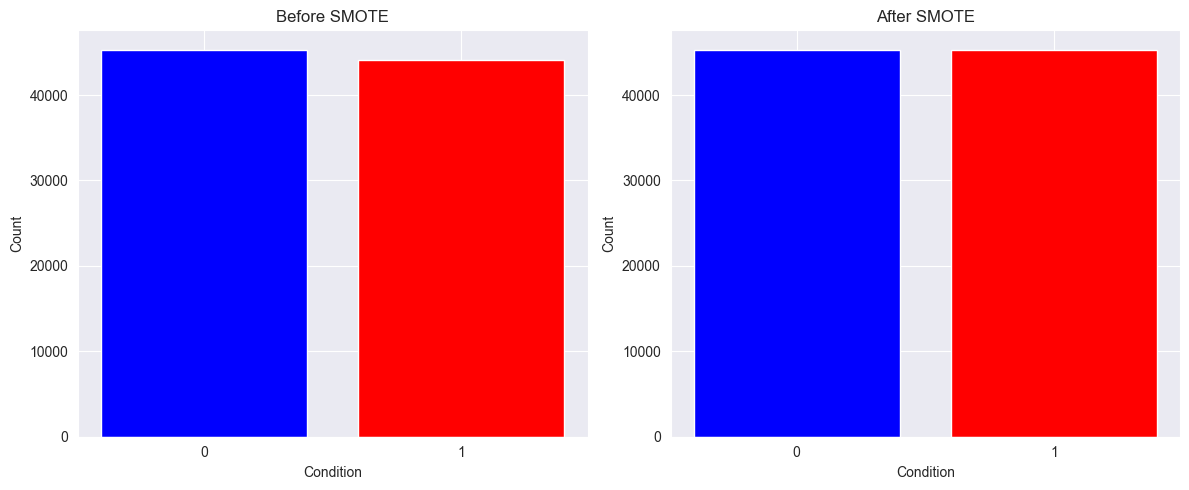

In [44]:
from imblearn.over_sampling import SMOTE

print("\n----------------Phase III: Classification Analysis:-----------------\n")

print(car_prices_df.info())

downsampled_df = data.sample(frac=0.2, replace=False, random_state=1)

X = downsampled_df.drop(['condition'], axis=1)
y = downsampled_df['condition']

threshold_value = y.median()
y = pd.cut(y, bins=[-float('inf'), threshold_value, float('inf')], labels=[0, 1])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=5805
)

print(y.value_counts())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Plotting class distribution before SMOTE
axes[0].bar([0, 1], y_train.value_counts(), color=['blue', 'red'])
axes[0].set_title('Before SMOTE')
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=5805)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Printing class distribution after applying SMOTE
print(y_train.value_counts())

# Plotting class distribution after SMOTE
axes[1].bar([0, 1], y_train.value_counts(), color=['blue', 'red'])
axes[1].set_title('After SMOTE')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])

plt.tight_layout()
plt.show()
def evaluate_model(preds, y_test, model_name, dt_best):
    print(f'{model_name} Results:')
    table = PrettyTable()

    # Adding headers for all metrics
    table.field_names = ["Confusion Matrix", "Precision", "Recall", "F1-Score", "ROC AUC"]

    # Compute metrics
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    # Compute ROC AUC
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # Format confusion matrix
    cm = confusion_matrix(y_test, preds)
    cm_str = f"[[{cm[0, 0]}, {cm[0, 1]}],\n [{cm[1, 0]}, {cm[1, 1]}]]"

    # Add rows for metrics
    table.add_row([cm_str, f"{precision:.3f}", f"{recall:.3f}", f"{f1:.3f}", f"{roc_auc:.3f}"])
    print(table)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve {}".format(model_name))
    plt.legend(loc="lower right")
    plt.show()

    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    scores = []
    for train_idx, test_idx in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        model = dt_best.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_test_fold)
        scores.append(f1_score(y_test_fold, preds))

    print(f'Stratified K-fold Cross-Validation F1-Score: {np.mean(scores):.3f}')
    print('--------------------------------')

Decision Tree Classifier Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[7789, 3539],  |   0.675   | 0.667  |  0.671   |  0.677  |
|   [3667, 7358]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


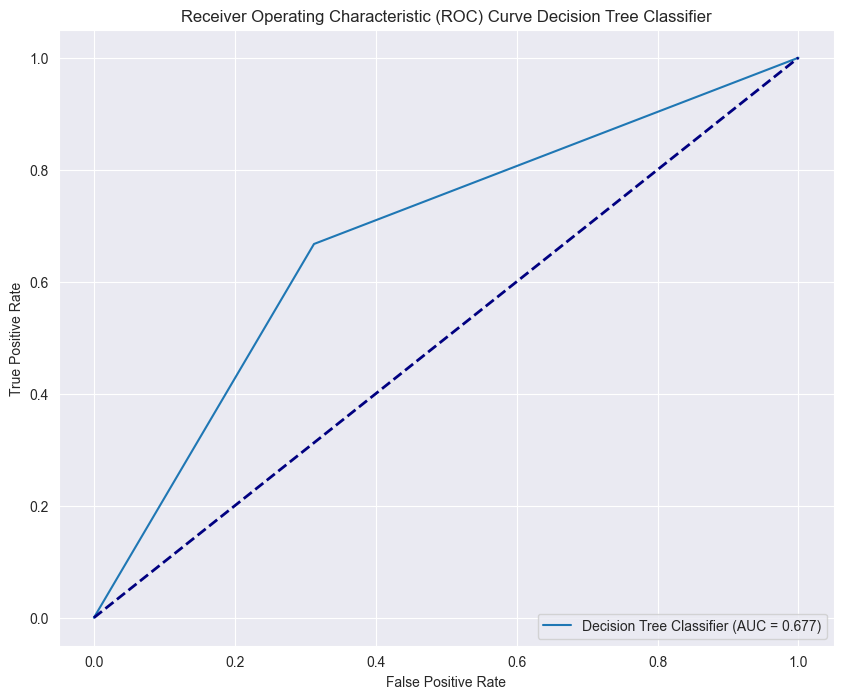

Stratified K-fold Cross-Validation F1-Score: 0.675
--------------------------------
Accuracy: 0.6776271641390418
Feature Importance: year            0.031
make            0.028
model           0.036
trim            0.039
body            0.029
transmission    0.003
vin             0.092
state           0.056
odometer        0.115
color           0.039
interior        0.024
seller          0.086
mmr             0.108
sellingprice    0.308
saleyear        0.006
dtype: float64
feature to be removed : transmission


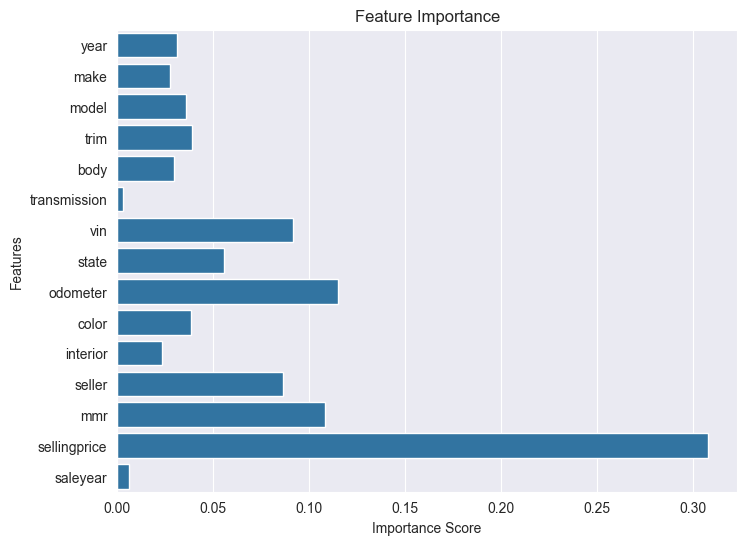

In [45]:
dt_model = DecisionTreeClassifier(random_state=5805)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
evaluate_model(y_pred, y_test, "Decision Tree Classifier", dt_model)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
importance = pd.Series(dt_model.feature_importances_, index=X.columns)
print("Feature Importance:", importance)
print("feature to be removed :", importance.idxmin())

plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

selected_dt_features = importance.sort_values()[::-1][:6]



Index(['sellingprice', 'odometer', 'mmr', 'vin', 'seller', 'state'], dtype='object')
Decision Tree Classifier_2 Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[7781, 3547],  |   0.676   | 0.670  |  0.673   |  0.679  |
|   [3634, 7391]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


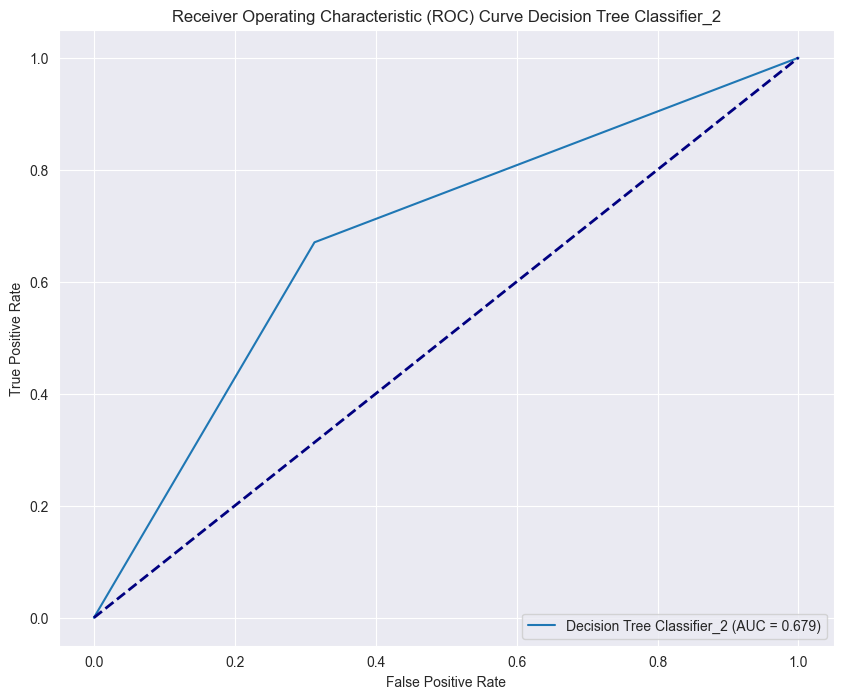

Stratified K-fold Cross-Validation F1-Score: 0.675
--------------------------------


In [46]:
print(selected_dt_features.index)

X2 = downsampled_df[selected_dt_features.index]

X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, stratify=y, random_state=5805
)
dt_model2 = DecisionTreeClassifier(random_state=5805)
dt_model2.fit(X_train, y_train)

y_pred_dt2 = dt_model2.predict(X_test)
evaluate_model(y_pred_dt2, y_test, "Decision Tree Classifier_2", dt_model2)

{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy of pre tuned tree 0.707


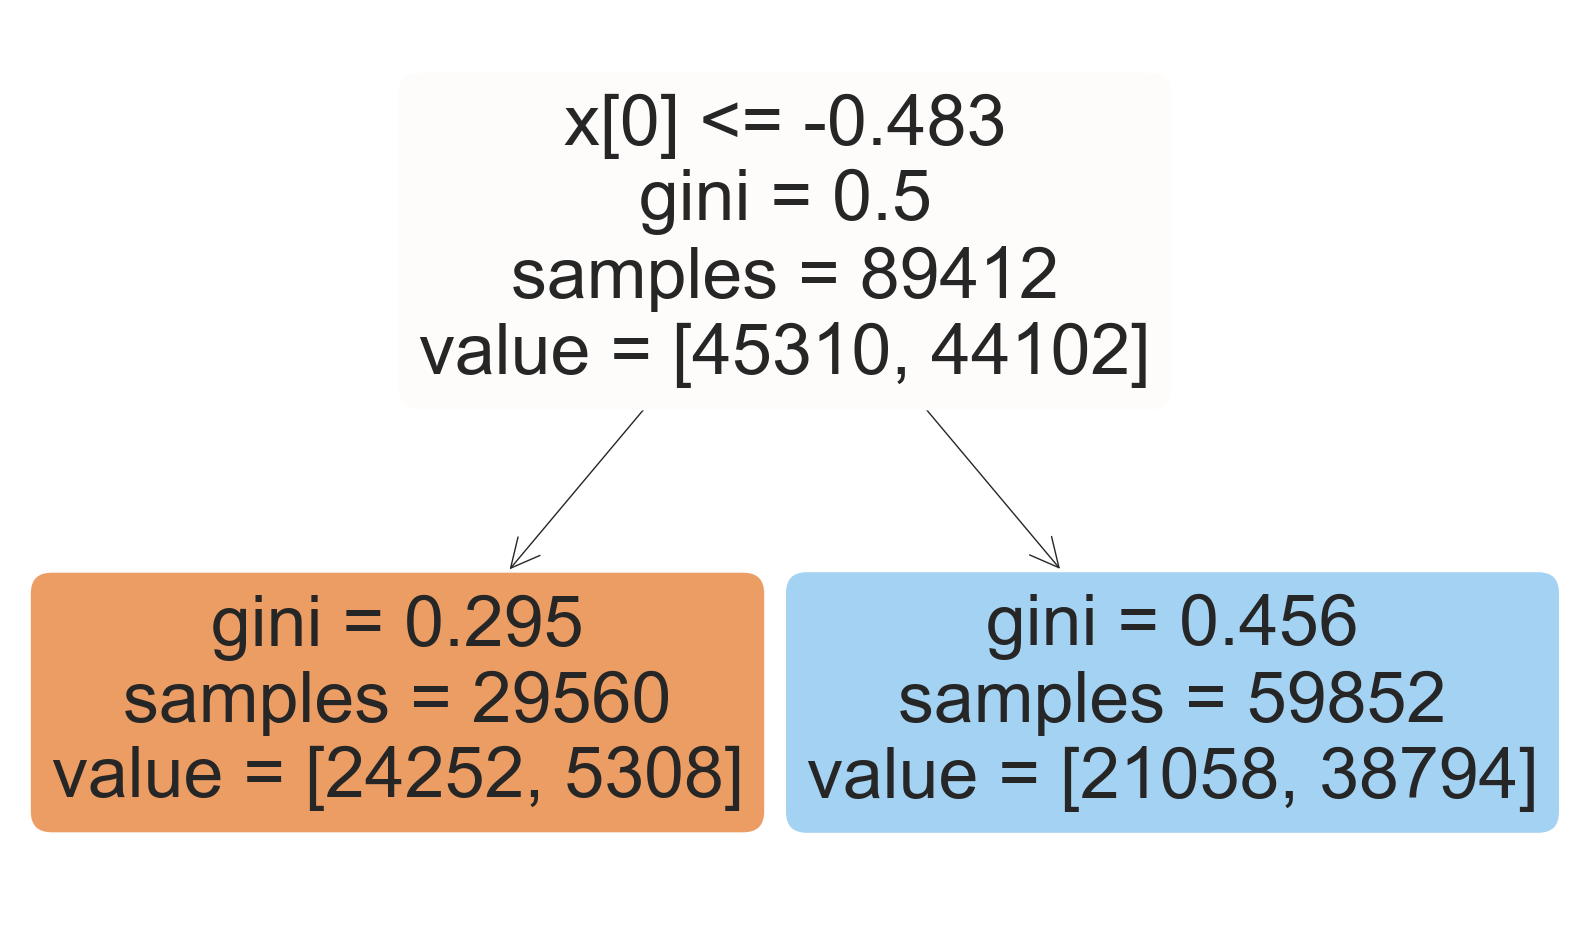

{'ccp_alphas': array([0.00000000e+00, 5.51652176e-06, 5.57887047e-06, ...,
       5.89297063e-03, 7.55534176e-03, 9.71903728e-02]), 'impurities': array([0.00000000e+00, 2.20660870e-05, 4.43815689e-05, ...,
       3.95163019e-01, 4.02718361e-01, 4.99908733e-01])}


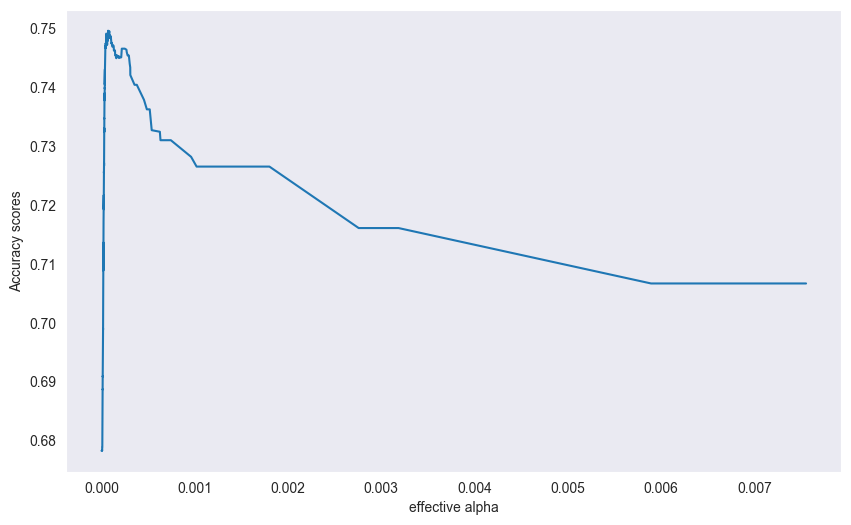

accuracy for post pruning :  0.75
 pre metrics  [[6061 5267]
 [1290 9735]] 0.8829931972789116 0.7066612982597414 0.7090195506168571
  Pruning Method  Accuracy              Confusion Matrix  Recall    AUC
0     Pre-Pruned     0.707  [[6061, 5267], [1290, 9735]]   0.883  0.709
1    Post-Pruned     0.750  [[7961, 3367], [2232, 8793]]   0.798  0.750
Logistic Regression Accuracy: 0.735


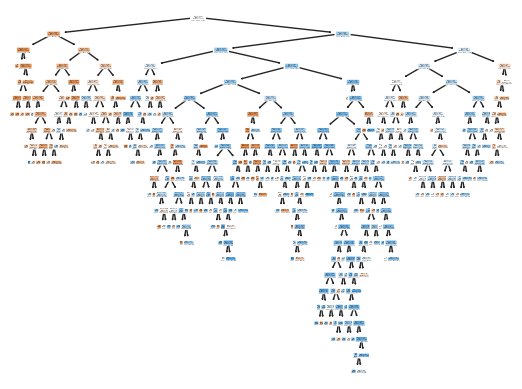

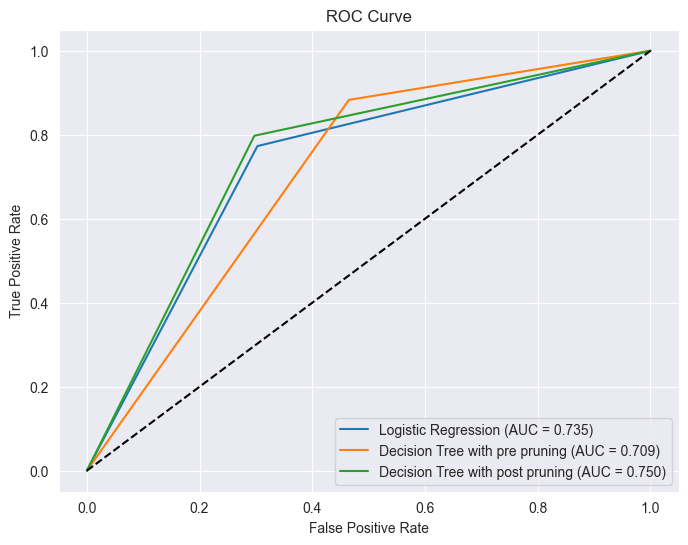

Logistic Regression Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[7899, 3429],  |   0.713   | 0.773  |  0.742   |  0.735  |
|   [2503, 8522]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


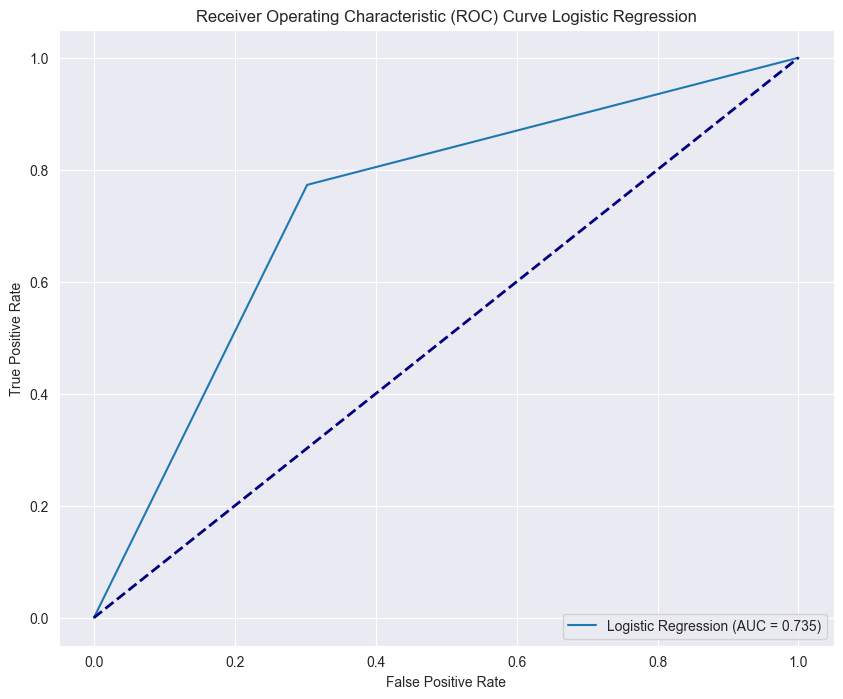

Stratified K-fold Cross-Validation F1-Score: 0.753
--------------------------------
Pre Pruned Decision Tree Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[6061, 5267],  |   0.649   | 0.883  |  0.748   |  0.709  |
|   [1290, 9735]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


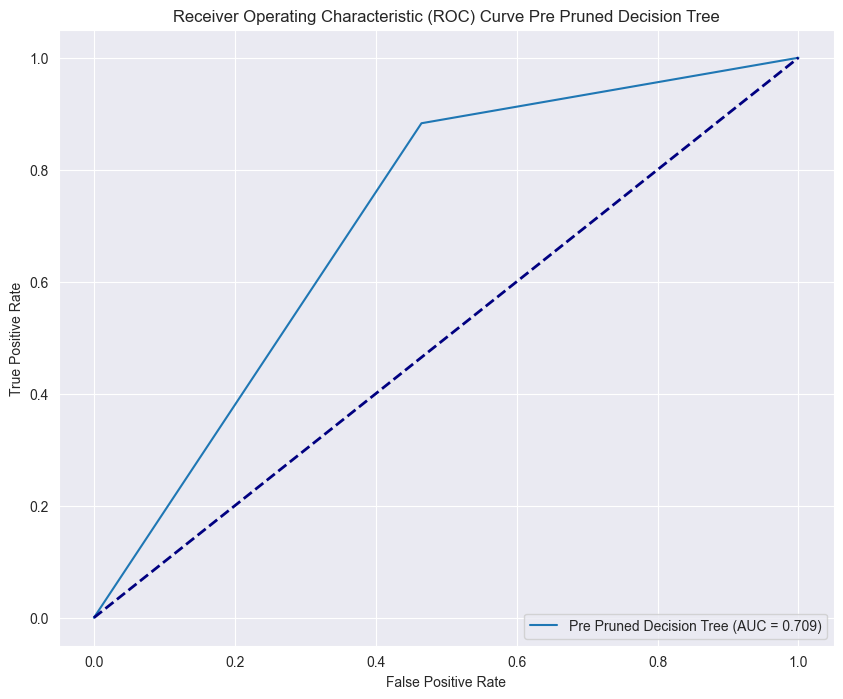

Stratified K-fold Cross-Validation F1-Score: 0.746
--------------------------------
Post Pruned Decision Tree Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[7961, 3367],  |   0.723   | 0.798  |  0.759   |  0.750  |
|   [2232, 8793]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


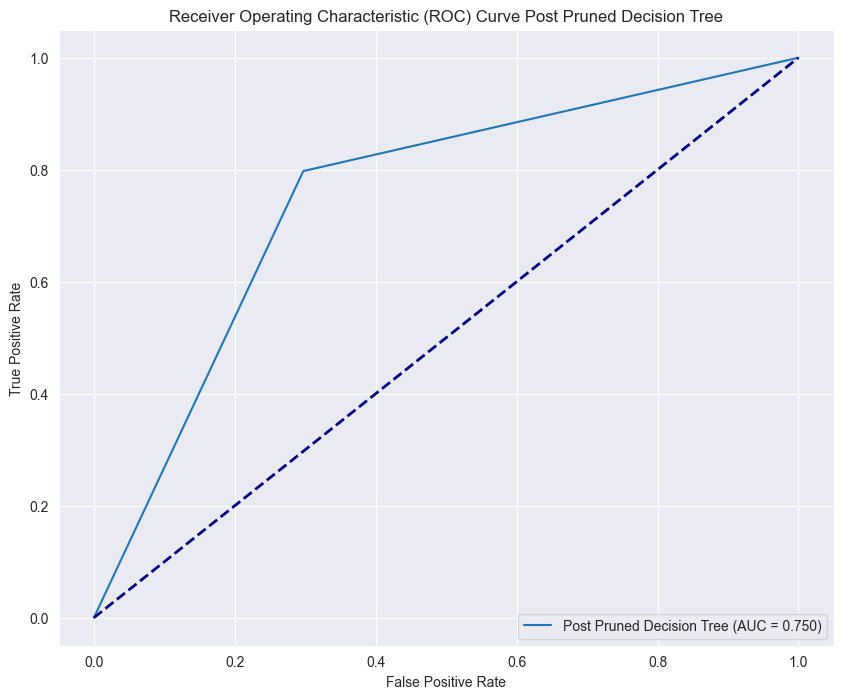

Stratified K-fold Cross-Validation F1-Score: 0.758
--------------------------------
  Pruning Method  Accuracy              Confusion Matrix  Recall    AUC
0     Pre-Pruned     0.707  [[6061, 5267], [1290, 9735]]   0.883  0.709
1    Post-Pruned     0.750  [[7961, 3367], [2232, 8793]]   0.798  0.750
2       Logistic     0.735  [[7899, 3429], [2503, 8522]]   0.773  0.735


In [47]:
tuned_parameters = [{"max_depth": range(2, 10, 1),
                     "min_samples_leaf": range(2, 10, 1),
                     "min_samples_split": range(2, 10, 1),
                     'max_features': [None, 'sqrt', 'log2'],
                     'splitter': ['best', 'random'],
                     'criterion': ['gini', 'entropy']}]

dt_model_pruned = DecisionTreeClassifier(random_state=5805, ccp_alpha=0.09)

grid_search = GridSearchCV(estimator=dt_model_pruned, param_grid=tuned_parameters, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
dt_model_pre_pruned = grid_search.best_estimator_
dt_model_pre_pruned.fit(X_train, y_train)
y_pre_predicted = dt_model_pre_pruned.predict(X_test)
print(f'Accuracy of pre tuned tree {accuracy_score(y_test, y_pre_predicted):.3f}')

plt.figure(figsize=(20, 12))
plot_tree(dt_model_pre_pruned, rounded=True, filled=True)
plt.show()

path = dt_model.cost_complexity_pruning_path(X_train, y_train)
print(path)

ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=5806, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
max_acc_score_index = acc_scores.index(max(acc_scores))
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")
plt.show()

post_pruning_clf = clfs[max_acc_score_index]
post_pruning_clf.fit(X_train, y_train)
y_post_predicted = post_pruning_clf.predict(X_test)
post_pruning_acc = accuracy_score(y_test, y_post_predicted)

print("accuracy for post pruning : ", round(post_pruning_acc, 3))
plot_tree(decision_tree=post_pruning_clf, rounded=True, filled=True)

pre_confusion_matrix = confusion_matrix(y_test, y_pre_predicted)
pre_accuracy = accuracy_score(y_test, y_pre_predicted)
pre_recall = recall_score(y_test, y_pre_predicted)
pre_roc_auc = roc_auc_score(y_test, y_pre_predicted)
print(" pre metrics ", pre_confusion_matrix, pre_recall, pre_accuracy, pre_roc_auc)

post_confusion_matrix = confusion_matrix(y_test, y_post_predicted)
post_accuracy = accuracy_score(y_test, y_post_predicted)
post_recall = recall_score(y_test, y_post_predicted)
post_roc_auc = roc_auc_score(y_test, y_post_predicted)
metrics_data = {
    'Pruning Method': ['Pre-Pruned', 'Post-Pruned'],
    'Accuracy': [pre_accuracy, post_accuracy],
    'Confusion Matrix': [pre_confusion_matrix, post_confusion_matrix],
    'Recall': [pre_recall, post_recall],
    'AUC': [pre_roc_auc, post_roc_auc]
}

metrics_df = pd.DataFrame(metrics_data)

print(metrics_df.head())

logreg_model = LogisticRegression(random_state=5805)
logreg_model.fit(X_train, y_train)
y_logistic_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_logistic_pred)
print("Logistic Regression Accuracy:", round(accuracy, 3))

logistic_auc = roc_auc_score(y_test, y_logistic_pred)
dt_pre_auc = roc_auc_score(y_test, y_pre_predicted)
dt_post_auc = roc_auc_score(y_test, y_post_predicted)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_logistic_pred)
fpr_dt_pre, tpr_dt_pre, _ = roc_curve(y_test, y_pre_predicted)
fpr_dt_post, tpr_dt_post, _ = roc_curve(y_test, y_post_predicted)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {logistic_auc:.3f})')
plt.plot(fpr_dt_pre, tpr_dt_pre, label=f'Decision Tree with pre pruning (AUC = {dt_pre_auc:.3f})')
plt.plot(fpr_dt_post, tpr_dt_post, label=f'Decision Tree with post pruning (AUC = {dt_post_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

logistic_confusion_matrix = confusion_matrix(y_test, y_logistic_pred)
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
logistic_recall = recall_score(y_test, y_logistic_pred)
logistic_auc = roc_auc_score(y_test, y_logistic_pred)
metrics_data = {
    'Pruning Method': ['Pre-Pruned', 'Post-Pruned', 'Logistic'],
    'Accuracy': [pre_accuracy, post_accuracy, logistic_accuracy],
    'Confusion Matrix': [pre_confusion_matrix, post_confusion_matrix, logistic_confusion_matrix],
    'Recall': [pre_recall, post_recall, logistic_recall],
    'AUC': [pre_roc_auc, post_roc_auc, logistic_auc]
}
metrics_df = pd.DataFrame(metrics_data)

evaluate_model(y_logistic_pred, y_test, "Logistic Regression", logreg_model)
evaluate_model(y_pre_predicted, y_test, "Pre Pruned Decision Tree", dt_model_pre_pruned)
evaluate_model(y_post_predicted, y_test, "Post Pruned Decision Tree", post_pruning_clf)

print(metrics_df)


--------------------------KNN-----------------------


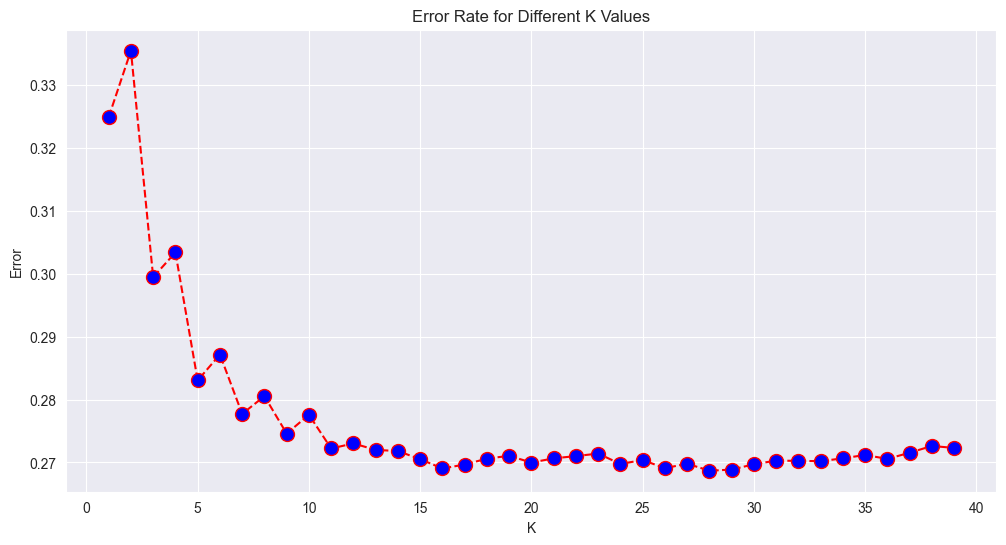

Minimum error: 0.26868876660850893
Optimum K: 28
KNN Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[7739, 3589],  |   0.706   | 0.781  |  0.741   |  0.732  |
|   [2417, 8608]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


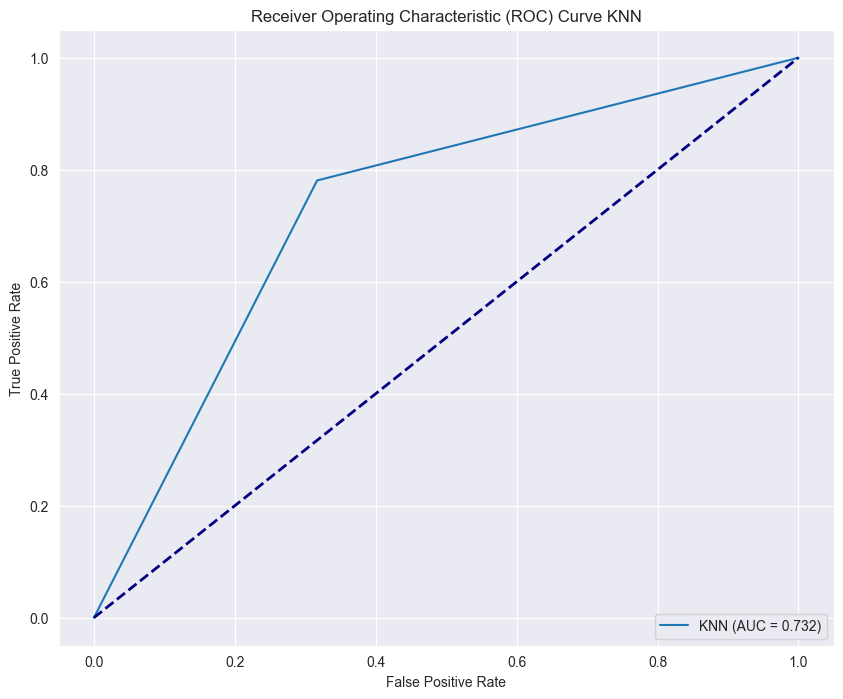

Stratified K-fold Cross-Validation F1-Score: 0.723
--------------------------------


In [48]:
print("\n--------------------------KNN-----------------------\n")

error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

plt.title('Error Rate for Different K Values')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

knn = KNeighborsClassifier(n_neighbors=error.index(min(error)) + 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('Minimum error:', min(error))
print('Optimum K:', error.index(min(error)) + 1)
evaluate_model(pred, y_test, 'KNN', knn)



------------------------------SVM----------------------------
Best Hyperparameters: {'kernel': 'linear'}
SVM Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[7538, 3790],  |   0.702   | 0.811  |  0.752   |  0.738  |
|   [2089, 8936]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


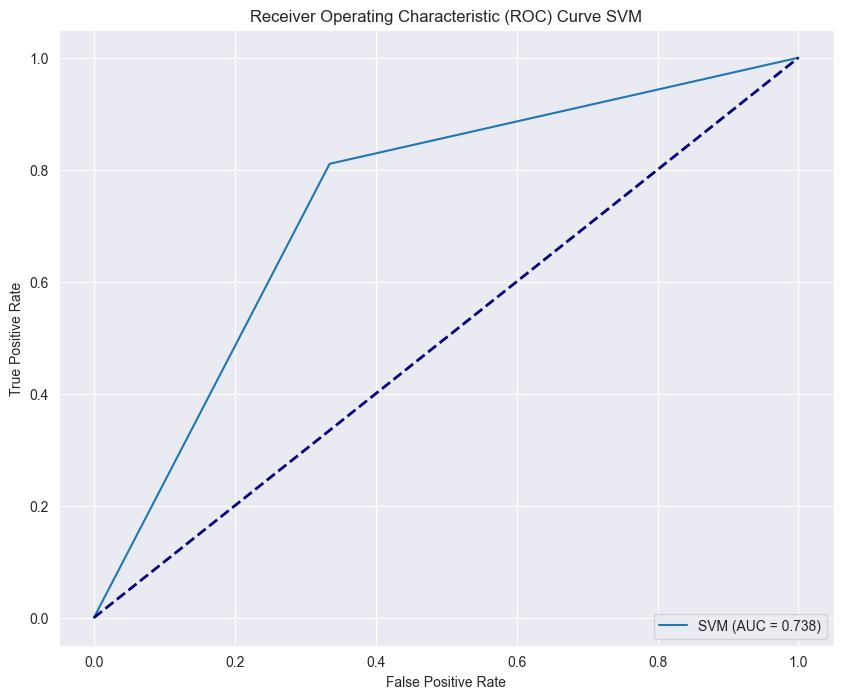

Stratified K-fold Cross-Validation F1-Score: 0.759
--------------------------------


In [49]:
print("\n------------------------------SVM----------------------------\n")

parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5805)

# Perform grid search with cross-validation
svm_classifier = SVC(probability=True)
grid_search = GridSearchCV(svm_classifier, parameters, cv=stratified_kfold, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
svm = grid_search.best_estimator_
svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)
evaluate_model(y_svm_pred, y_test, 'SVM', svm)




Naive Bayes Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[11298, 30],   |   0.744   | 0.008  |  0.016   |  0.503  |
|   [10938, 87]]   |           |        |          |         |
+------------------+-----------+--------+----------+---------+


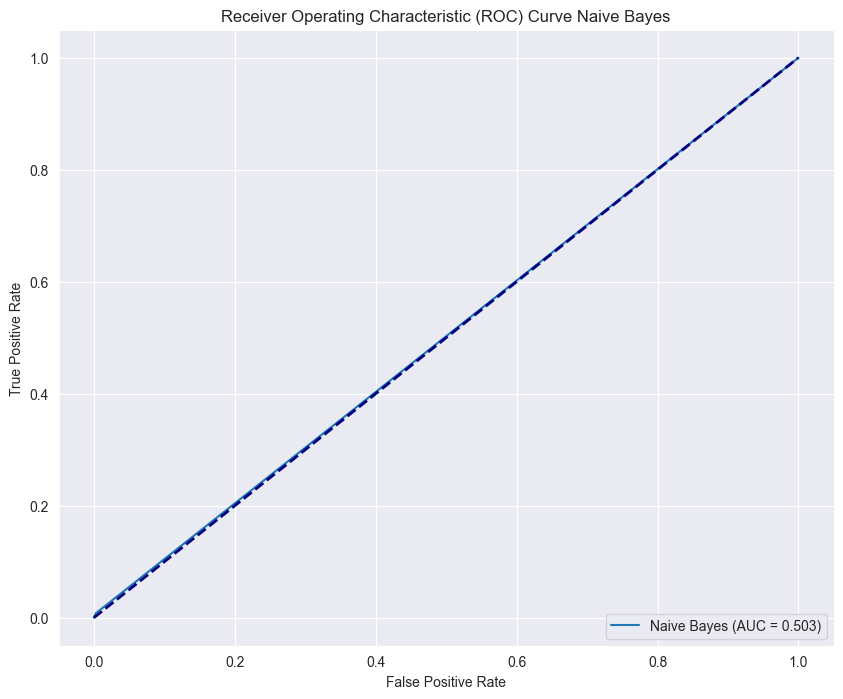

Stratified K-fold Cross-Validation F1-Score: 0.010
--------------------------------


In [50]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_nb_pred = nb_model.predict(X_test)
evaluate_model(y_nb_pred, y_test, 'Naive Bayes', nb_model)



Bagging Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[8196, 3132],  |   0.734   | 0.785  |  0.759   |  0.755  |
|   [2365, 8660]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


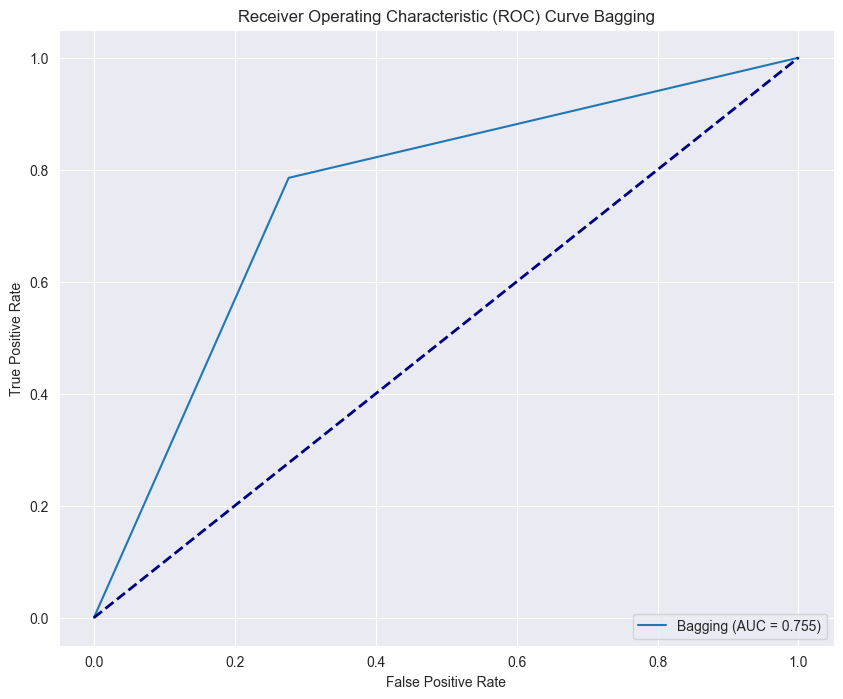

Stratified K-fold Cross-Validation F1-Score: 0.767
--------------------------------


In [51]:
# Bagging
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=5805)
bagging_clf.fit(X_train, y_train)
y_bagging_pred = bagging_clf.predict(X_test)
evaluate_model(y_bagging_pred, y_test, 'Bagging', bagging_clf)



Stacking Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[8020, 3308],  |   0.719   | 0.766  |  0.742   |  0.737  |
|   [2580, 8445]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


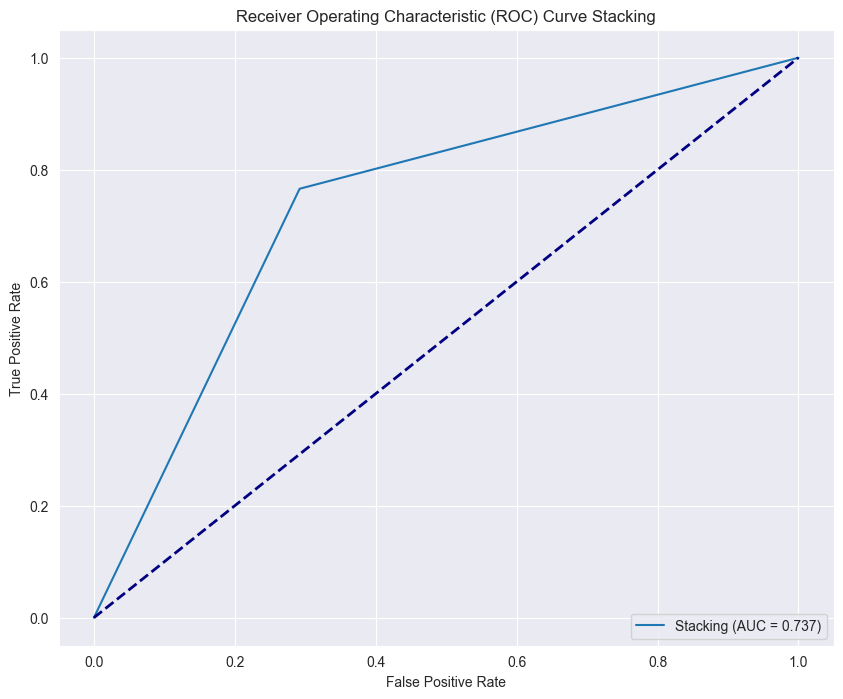

Stratified K-fold Cross-Validation F1-Score: 0.749
--------------------------------


In [52]:
# Stacking
estimators = [('dt', DecisionTreeClassifier()), ('lr', LogisticRegression())]
stacking_clf = StackingClassifier(estimators=estimators)
stacking_clf.fit(X_train, y_train)
y_stacking_pred = stacking_clf.predict(X_test)
evaluate_model(y_stacking_pred, y_test, 'Stacking', stacking_clf)



Boosting Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[7799, 3529],  |   0.677   | 0.671  |  0.674   |  0.680  |
|   [3627, 7398]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


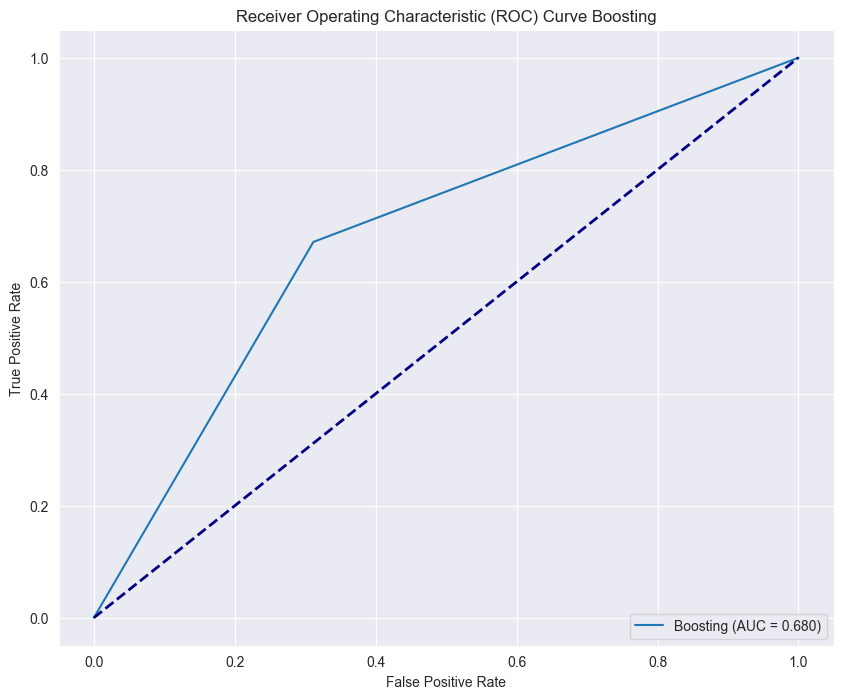

Stratified K-fold Cross-Validation F1-Score: 0.673
--------------------------------


In [53]:
# Boosting
boosting_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=5805)
boosting_clf.fit(X_train, y_train)
y_boosting_pred = boosting_clf.predict(X_test)
evaluate_model(y_boosting_pred, y_test, 'Boosting', boosting_clf)



Neural Network Results:
+------------------+-----------+--------+----------+---------+
| Confusion Matrix | Precision | Recall | F1-Score | ROC AUC |
+------------------+-----------+--------+----------+---------+
|  [[8290, 3038],  |   0.740   | 0.782  |  0.760   |  0.757  |
|   [2399, 8626]]  |           |        |          |         |
+------------------+-----------+--------+----------+---------+


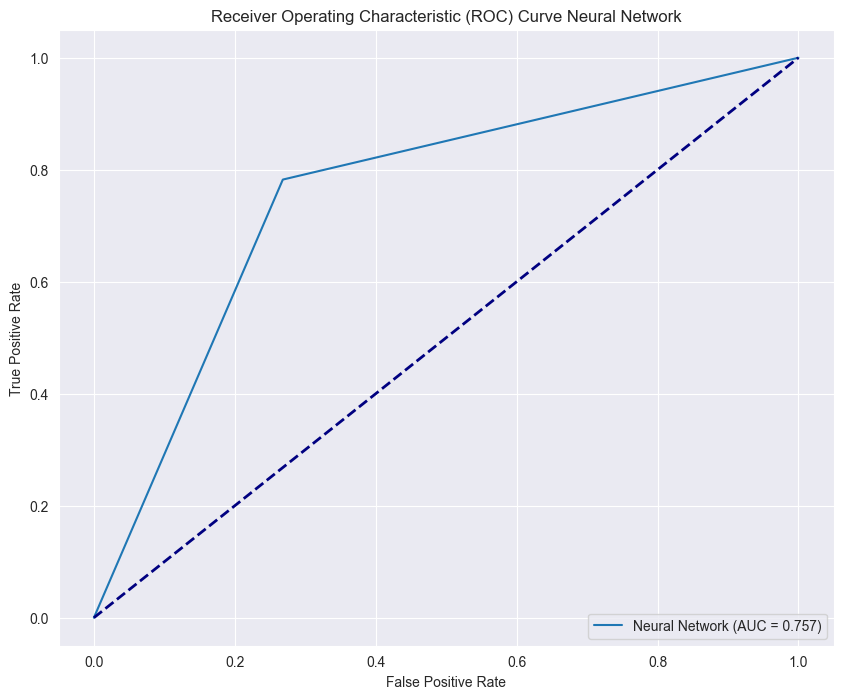

Stratified K-fold Cross-Validation F1-Score: 0.758
--------------------------------


In [54]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=5805)
nn_model.fit(X_train, y_train)
y_nn_pred = nn_model.predict(X_test)
evaluate_model(y_nn_pred, y_test, 'Neural Network', nn_model)

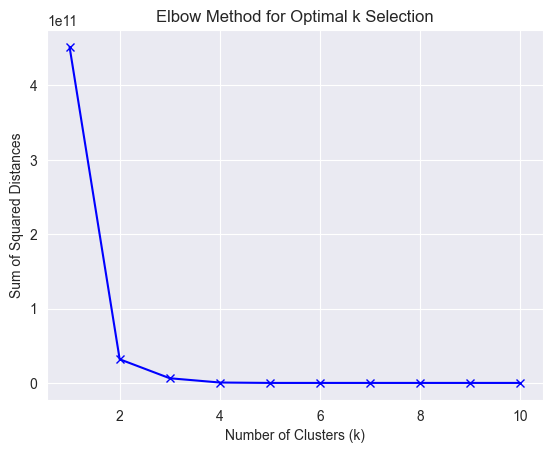

In [55]:
sum_of_squared_distances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=5805)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1, 11), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k Selection')
plt.show()

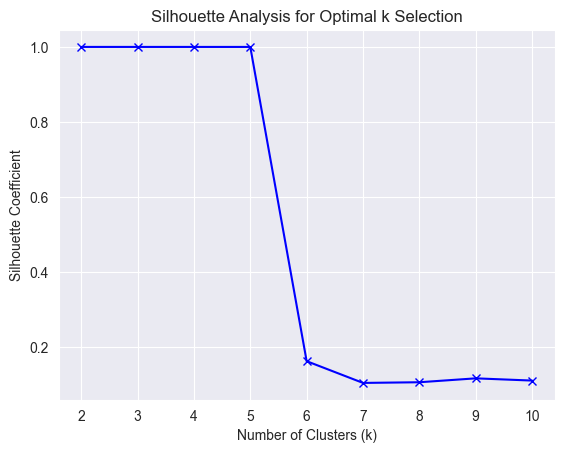

In [56]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=5805)
    kmeans.fit(X)

    silhouette_coefficients.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette_coefficients, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Analysis for Optimal k Selection')
plt.show()


---------------DBSCAN-------------
[0 0 0 ... 0 0 1]


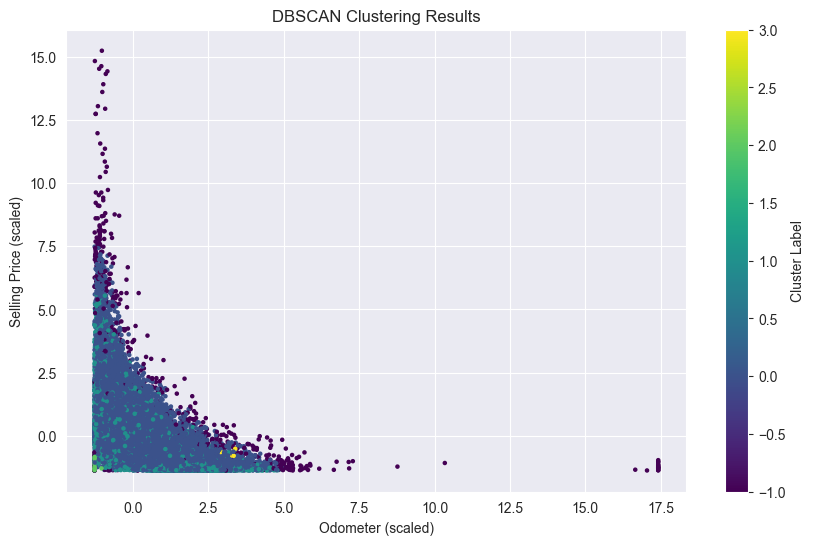


---------------END OF DBSCAN-------------


In [60]:
print("\n---------------DBSCAN-------------\n")

data = car_prices_df.copy().sample(frac=0.2)
data_clean = data.dropna(subset=['condition', 'odometer', 'mmr', 'sellingprice', 'year'])
features = data_clean[['year', 'condition', 'odometer', 'mmr', 'sellingprice']]
features_scaled = StandardScaler().fit_transform(features)
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(features_scaled)
print(clusters)
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 2], features_scaled[:, 4], c=clusters, cmap='viridis', s=5)
plt.xlabel('Odometer (scaled)')
plt.ylabel('Selling Price (scaled)')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()
print("\n---------------END OF DBSCAN-------------\n")


In [65]:
print("\n---------------------ASSOCIATION RULE MINING------------------\n")

df_apriori_filtered = car_prices_df[['make', 'model', 'trim', 'transmission']].sample(frac=0.05)
df_apriori_filtered = pd.get_dummies(df_apriori_filtered, drop_first=True)
frequent_itemsets = apriori(df_apriori_filtered, min_support=0.1, use_colnames=True, verbose=1)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)
rules = rules.sort_values(['confidence'], ascending=False)
print(rules.head(10))

print("\n---------------------ASSOCIATION RULE MINING------------------\n")



---------------------ASSOCIATION RULE MINING------------------
Processing 12 combinations | Sampling itemset size 2
                antecedents               consequents  antecedent support  \
2               (make_Ford)  (transmission_automatic)               0.184   
0          (make_Chevrolet)  (transmission_automatic)               0.108   
5               (trim_Base)  (transmission_automatic)               0.116   
3  (transmission_automatic)               (make_Ford)               0.970   
4  (transmission_automatic)               (trim_Base)               0.970   
1  (transmission_automatic)          (make_Chevrolet)               0.970   

   consequent support  support  confidence   lift   leverage  conviction  \
2               0.970    0.179       0.976  1.006  1.101e-03       1.248   
0               0.970    0.105       0.975  1.005  5.291e-04       1.195   
5               0.970    0.111       0.951  0.981 -2.184e-03       0.616   
3               0.184    0.179       0.